# Forest Type Prediction

### Referências

* https://www.kaggle.com/c/forest-cover-type-prediction

## Importando bibliotecas e analisando o dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize

#Classification Algorithms.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#Model Selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Evaluation Metrics
from sklearn import metrics

In [2]:
train = pd.read_csv(r'C:\Users\LENOVO\Downloads\forest-cover-type-prediction\train.csv')
test = pd.read_csv(r'C:\Users\LENOVO\Downloads\forest-cover-type-prediction\test.csv')
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.skew()

Id                                      0.000000
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6          

In [515]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [492]:
train.iloc[:,21:].describe()

,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [437]:
#Verificando o tamanho das amostras
print(train.shape, test.shape)

(15120, 56) (565892, 55)


In [493]:
#Observa-se que não há nenhum 
print(train.isnull().sum(), test.isnull().sum())

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [36]:
train = train.drop(['Soil_Type7', 'Soil_Type15'], axis=1)
test = test.drop(['Soil_Type7', 'Soil_Type15'], axis=1)

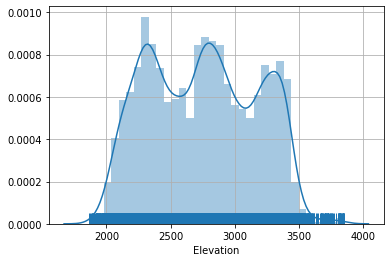

In [439]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.distplot(train.Elevation, rug=True)
plt.grid()

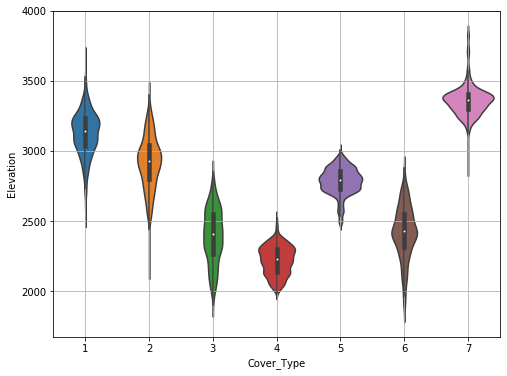

In [440]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Elevation)
plt.grid()

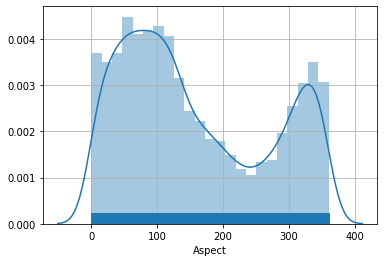

In [441]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.distplot(train.Aspect, rug=True)
plt.grid()

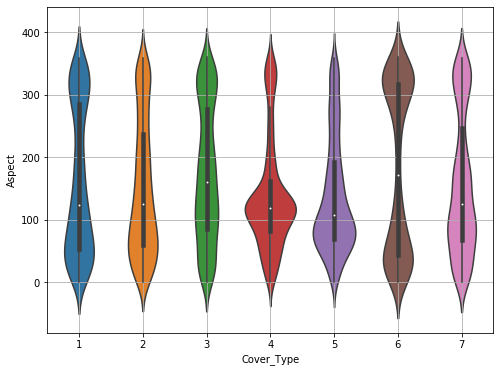

In [442]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Aspect)
plt.grid()

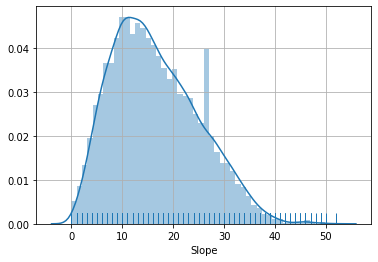

In [443]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.distplot(train.Slope, rug=True)
plt.grid()

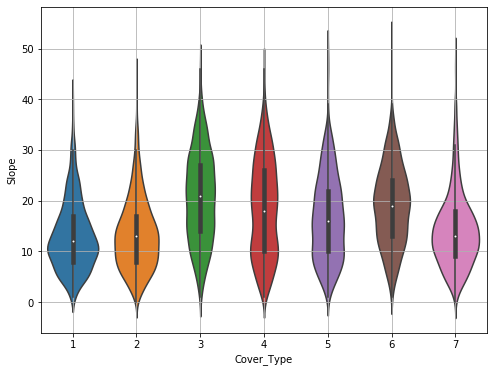

In [444]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Slope)
plt.grid()

In [446]:
print(train.Horizontal_Distance_To_Hydrology.describe(),' ',test.Horizontal_Distance_To_Hydrology.describe())

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64   count    565892.000000
mean        270.556622
std         212.500153
min           0.000000
25%         108.000000
50%         228.000000
75%         390.000000
max        1397.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64


In [447]:
print(train.Vertical_Distance_To_Hydrology.describe(),' ',test.Vertical_Distance_To_Hydrology.describe())

count    15120.000000
mean        51.076521
std         61.239406
min       -146.000000
25%          5.000000
50%         32.000000
75%         79.000000
max        554.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64   count    565892.000000
mean         46.294408
std          58.209469
min        -173.000000
25%           7.000000
50%          29.000000
75%          69.000000
max         601.000000
Name: Vertical_Distance_To_Hydrology, dtype: float64


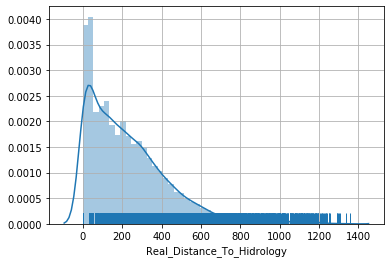

In [37]:
#Realizamos a fórmula de pitágoras para se ter a distância real do solo com a hidrologia
train['Real_Distance_To_Hidrology'] = np.sqrt(((train.Horizontal_Distance_To_Hydrology)**2) + 
                                              (train.Vertical_Distance_To_Hydrology)**2)
test['Real_Distance_To_Hidrology'] = np.sqrt(((test.Horizontal_Distance_To_Hydrology)**2) + 
                                              (test.Vertical_Distance_To_Hydrology)**2)
sns.distplot(train.Real_Distance_To_Hidrology, rug=True)
plt.grid()

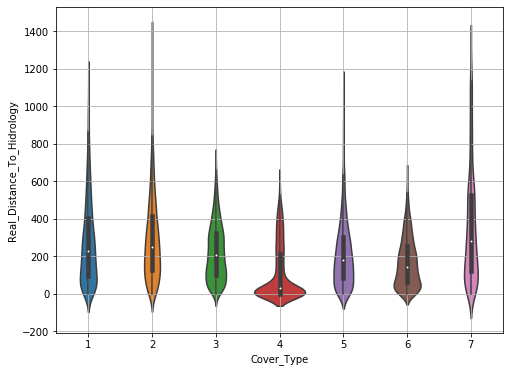

In [449]:
#Plotando o Violinplot é possível observar que todos tipos de solos possuem 'outliers' quanto à variável Distância
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Real_Distance_To_Hidrology)
plt.grid()

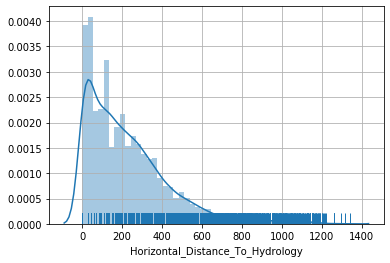

In [451]:
sns.distplot(train.Horizontal_Distance_To_Hydrology, rug=True)
plt.grid()

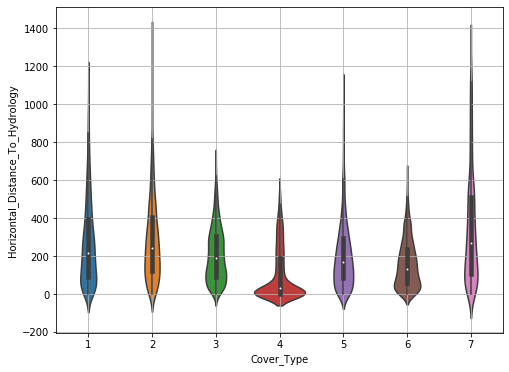

In [452]:
#Plotando o Violinplot é possível observar que todos tipos de solos possuem 'outliers' quanto à variável Distância
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Horizontal_Distance_To_Hydrology)
plt.grid()

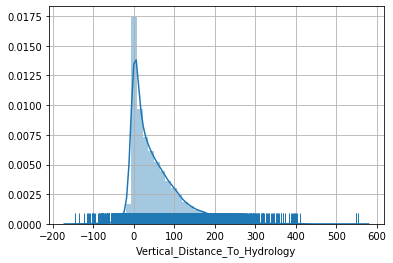

In [454]:
sns.distplot(train.Vertical_Distance_To_Hydrology, rug=True)
plt.grid()

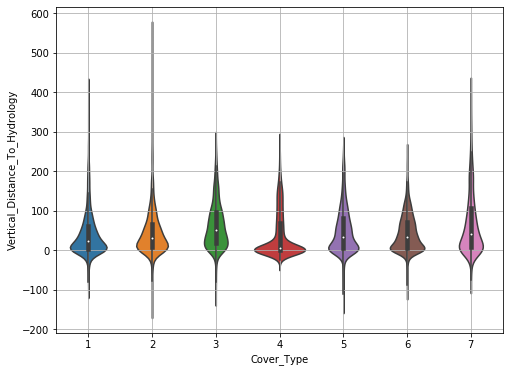

In [505]:
#Plotando o Violinplot é possível observar que todos tipos de solos possuem 'outliers' quanto à variável Distância
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Vertical_Distance_To_Hydrology)
plt.grid()

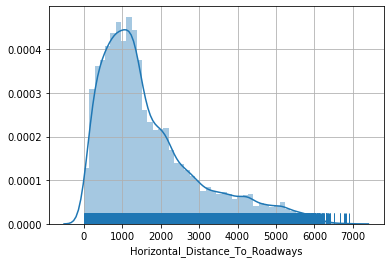

In [506]:
sns.distplot(train.Horizontal_Distance_To_Roadways, rug=True)
plt.grid()

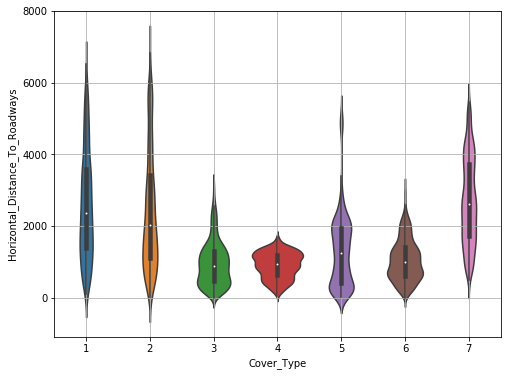

In [507]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Horizontal_Distance_To_Roadways)
plt.grid()

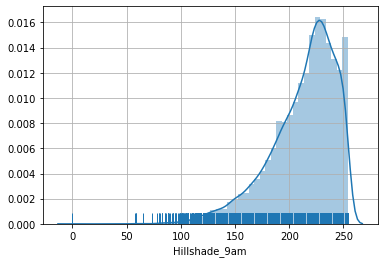

In [456]:
sns.distplot(train.Hillshade_9am, rug=True)
plt.grid()

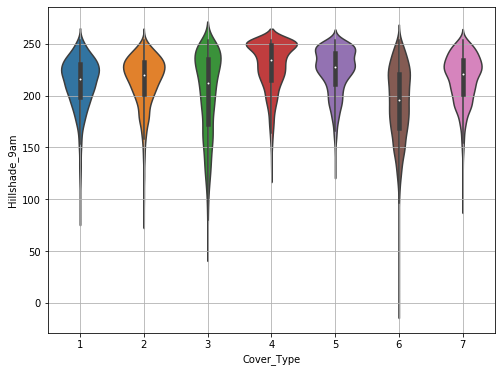

In [509]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Hillshade_9am)
plt.grid()

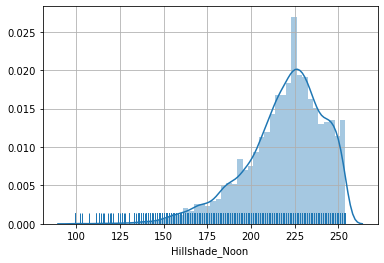

In [459]:
sns.distplot(train.Hillshade_Noon, rug=True)
plt.grid()

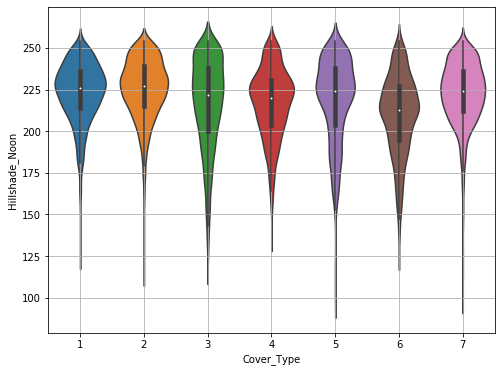

In [510]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Hillshade_Noon)
plt.grid()

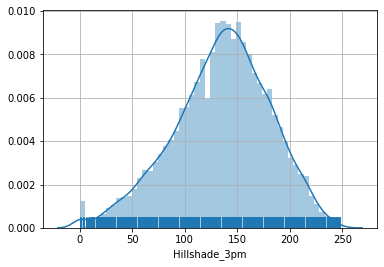

In [462]:
sns.distplot(train.Hillshade_3pm, rug=True)
plt.grid()

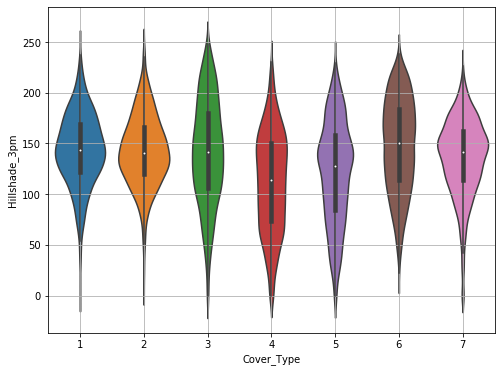

In [463]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Hillshade_3pm)
plt.grid()

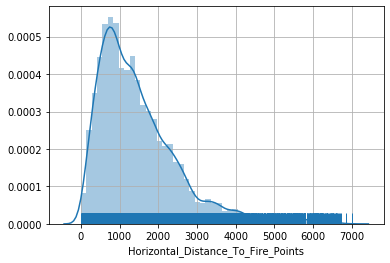

In [464]:
sns.distplot(train.Horizontal_Distance_To_Fire_Points, rug=True)
plt.grid()

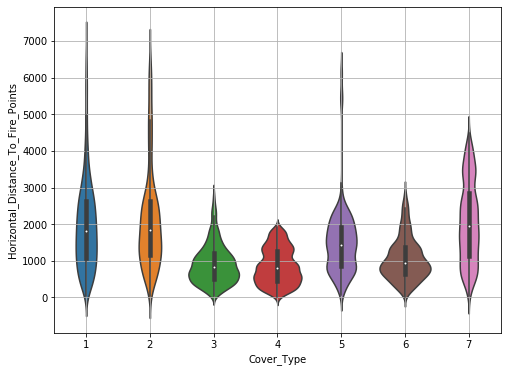

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x=train.Cover_Type, y=train.Horizontal_Distance_To_Fire_Points)
plt.grid()

In [38]:
cols_to_normalize = [
    'Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Real_Distance_To_Hidrology',
  'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Horizontal_Distance_To_Fire_Points'
]
    
train[cols_to_normalize] = normalize(train[cols_to_normalize])
test[cols_to_normalize] = normalize(test[cols_to_normalize])

## Feature Engineering e Separando as variáveis em X e Y

In [39]:
sc_train = train.iloc[:,1:11]
sc_train['Real_Distance_To_Hidrology'] = train['Real_Distance_To_Hidrology']
sc_test = test.iloc[:,1:11]
sc_test['Real_Distance_To_Hidrology'] = test['Real_Distance_To_Hidrology']
sc_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Real_Distance_To_Hidrology
0,2596,51,0.000475,0.040833,0.000000,0.080717,0.034977,0.036718,148,0.993770,0.040833
1,2590,56,0.000320,0.033905,-0.000960,0.062373,0.035185,0.037584,151,0.995569,0.033919
2,2804,139,0.001301,0.038746,0.009397,0.459748,0.033830,0.034409,135,0.884942,0.039869
3,2785,155,0.002588,0.034791,0.016964,0.444233,0.034216,0.034216,122,0.892923,0.038707
4,2595,45,0.000323,0.024691,-0.000161,0.063100,0.035504,0.037763,150,0.996048,0.024692


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(sc_train)
sc_test = sc.transform(sc_test)

In [41]:
train.iloc[:,1:11] = sc_train[:,0:10]
train['Real_Distance_To_Hidrology'] = sc_train[:,10]
test.iloc[:,1:11] = sc_test[:,0:10]
test['Real_Distance_To_Hidrology'] = sc_test[:,10]
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Real_Distance_To_Hidrology
0,1,-0.367095,-0.959980,-0.965383,-0.673501,-0.723373,-2.480909,-1.119576,-1.157723,0.281259,...,0,0,0,0,0,0,0,0,5,-0.690689
1,2,-0.381461,-0.914559,-0.980746,-0.741127,-0.748287,-2.560060,-1.116829,-1.145971,0.346627,...,0,0,0,0,0,0,0,0,5,-0.754982
2,3,0.130912,-0.160577,-0.883452,-0.693876,-0.479383,-0.845475,-1.134768,-1.189089,-0.002005,...,0,0,0,0,0,0,0,0,2,-0.699653
3,4,0.085421,-0.015231,-0.755891,-0.732481,-0.282919,-0.912417,-1.129661,-1.191707,-0.285268,...,0,0,0,0,0,0,0,0,2,-0.710464
4,5,-0.369489,-1.014485,-0.980458,-0.831065,-0.727563,-2.556922,-1.112601,-1.143531,0.324838,...,0,0,0,0,0,0,0,0,5,-0.840776


In [42]:
Id = test['Id']
train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

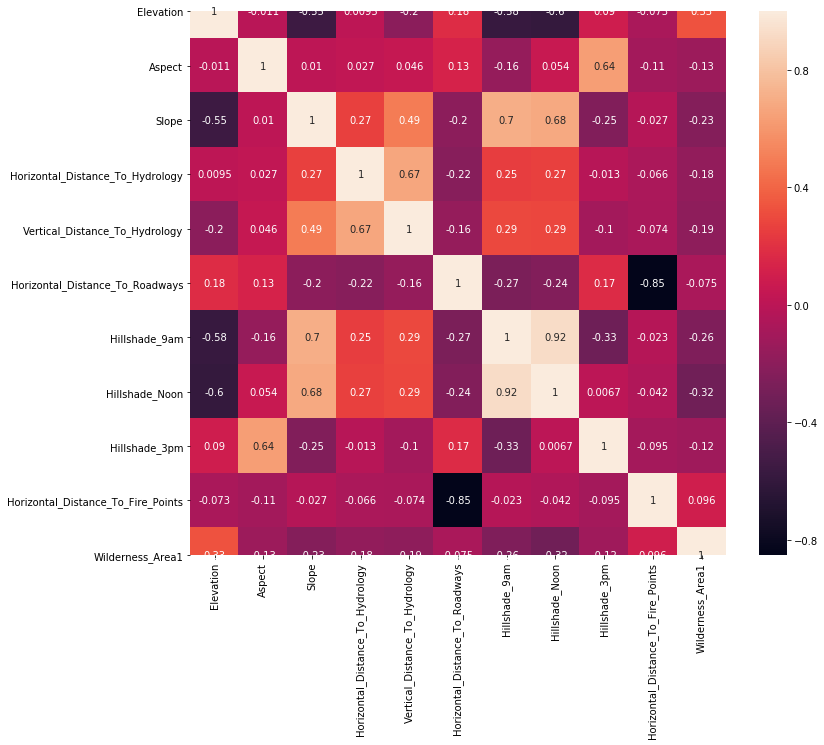

In [18]:
hm_map1 = train.iloc[:, :11]

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(hm_map1.corr(),annot=True)

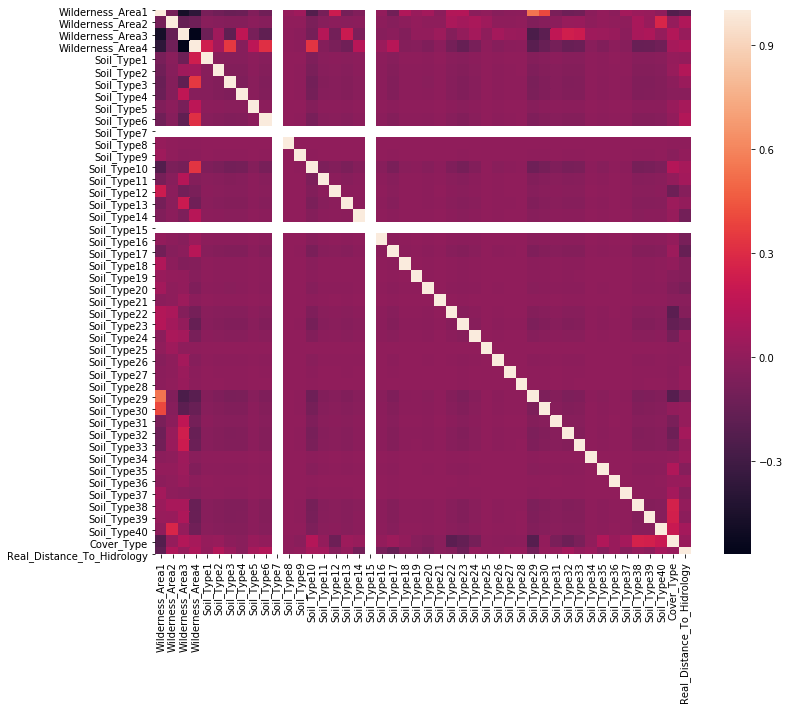

In [20]:
hm_map2 = train.iloc[:, 10:]

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(hm_map2.corr())

In [43]:
#Criando as variáveis de treino e teste
x_train = train.drop('Cover_Type', axis=1)
x_test = test
y_train = train.Cover_Type

In [44]:
# criando uma lista com todos os modelos
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    RandomForestClassifier(random_state = 0),]

In [45]:
# Definindo a validação cruzada
kf = StratifiedKFold(n_splits=10)

In [46]:
# Rodando todos os modelos classificadores na validação cruzada
for clf in classifiers:
    score = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print(np.mean(score).round(3))

KNeighborsClassifier
0.725
GaussianNB
0.462


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LogisticRegression
0.656
SVC
0.722
DecisionTreeClassifier
0.71
RandomForestClassifier
0.792


In [47]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [25, 29, 31, 35],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 150]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [50]:
grid_search.fit(x_train, y_train)
best = grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  5.1min finished


In [52]:
best

{'bootstrap': True,
 'max_depth': 29,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 150}

In [53]:
rf = RandomForestClassifier(bootstrap=True, max_depth=29, max_features=3, 
                            min_samples_leaf=3, min_samples_split=8, n_estimators=150)

rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [54]:
submission = pd.DataFrame({'Id': Id, 'Cover_Type': y_pred})
submission.to_csv('submission.csv', index = False)

In [19]:
[estimator.tree_.max_depth for estimator in rf.estimators_]


[33,
 33,
 29,
 31,
 34,
 31,
 28,
 27,
 34,
 29,
 30,
 34,
 33,
 28,
 29,
 35,
 27,
 34,
 31,
 31,
 32,
 30,
 28,
 27,
 29,
 28,
 27,
 32,
 30,
 30,
 33,
 28,
 32,
 30,
 29,
 31,
 27,
 27,
 26,
 31,
 33,
 29,
 41,
 31,
 31,
 33,
 30,
 46,
 33,
 30,
 33,
 33,
 30,
 30,
 30,
 33,
 34,
 30,
 30,
 28,
 33,
 30,
 29,
 36,
 30,
 34,
 32,
 26,
 29,
 28,
 30,
 36,
 33,
 28,
 29,
 30,
 31,
 29,
 30,
 34,
 28,
 28,
 33,
 33,
 29,
 29,
 31,
 31,
 27,
 29,
 29,
 29,
 29,
 29,
 32,
 34,
 31,
 27,
 29,
 35]